# EN 2550 Ex07
# 190432J
# Pathirana R.P.U.A.

Text(0.5, 0, 'z')

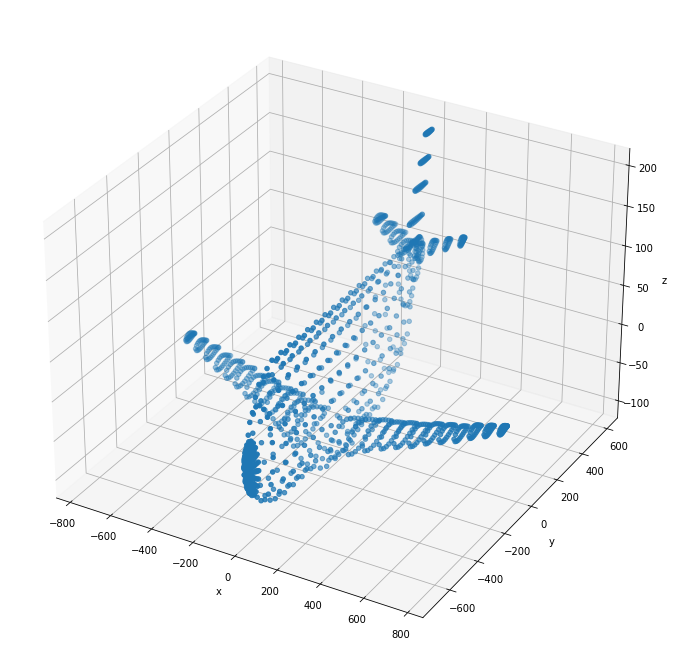

In [18]:

import numpy as np                                                                                                                        
from plyfile import PlyData, PlyElement # open3d is the standard                                                                            
import matplotlib.pyplot as plt                                                                                                          
pcd = PlyData.read('airplane.ply')                                                                                                
assert pcd is not None                                                                                                                    
points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)  


fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')




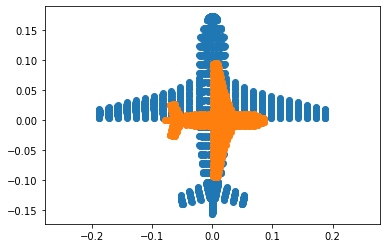

In [24]:
import numpy as np                                                                                                                        
from plyfile import PlyData, PlyElement # open3d is the standard                                                                            
import matplotlib.pyplot as plt                                                                                                          
pcd = PlyData.read('airplane.ply')                                                                                                
assert pcd is not None                                                                                                                    
points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)  

ones = np.ones((1,points.shape[1] ))
x = np.concatenate((points,ones), axis = 0 )

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis=1)

R = np.array([[0,1,0],
             [1,0,0],
             [0,0,1]])

K = np.array([[0.5,0,0],
             [0,0.5,0],
             [0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis=1)

x1 = P1 @ x
x2 = P2 @ x
x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig , ax = plt.subplots(1,1,sharex=True, sharey=True)

ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()


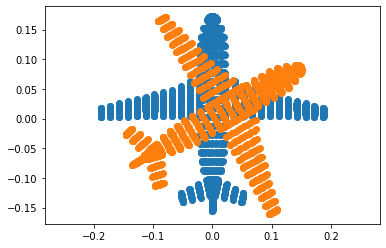

In [15]:
import numpy as np                                                                                                                        
from plyfile import PlyData, PlyElement # open3d is the standard                                                                            
import matplotlib.pyplot as plt                                                                                                          
pcd = PlyData.read('airplane.ply')                                                                                                
assert pcd is not None                                                                                                                    
points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)  

ones = np.ones((1,points.shape[1] ))
x = np.concatenate((points,ones), axis = 0 )

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis=1)

R = np.array([[0,1,0],
             [1,0,0],
             [0,0,1]])

K = np.array([[np.cos(np.pi/6),-1*np.sin(np.pi/6),0],
             [np.sin(np.pi/6),np.cos(np.pi/6),0],
             [0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis=1)

x1 = P1 @ x
x2 = P2 @ x
x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig , ax = plt.subplots(1,1,sharex=True, sharey=True)

ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

item 1 ,area in pixels 59143
item 1 ,area in mm^2 2318.642172
item 2 ,area in pixels 59211
item 2 ,area in mm^2 2321.3080440000003


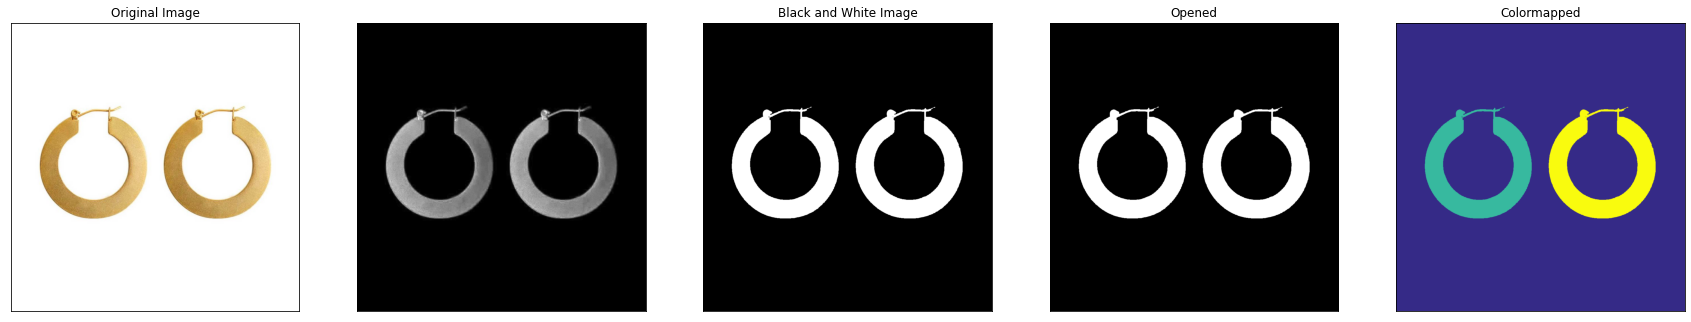

In [21]:
import cv2 as cv
import numpy as np
im = cv.imread(r'earrings.jpg', cv.IMREAD_COLOR)
assert im is not None
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

th, bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY + cv.THRESH_OTSU )

#Remove dots in the object foreground

w = 5 
kernal = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE,kernal)

retval , labels , stats , centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

z = 720
f = 8 
for i , s in enumerate(stats):
    if i != 0:
        print('item',i,',area in pixels', s[4])
        print('item',i,',area in mm^2', s[4]*(2.2e-3)**2*(z*z)/(f*f))

fig , ax =  plt.subplots(1,5,figsize =  (30,10))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[2].set_title('Black and White Image')

ax[3].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[3].set_xticks([]), ax[3].set_yticks([])
ax[3].set_title('Opened')

ax[4].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))
ax[4].set_xticks([]), ax[4].set_yticks([])
ax[4].set_title('Colormapped')
plt.show()

(0, 0, 0, 0)


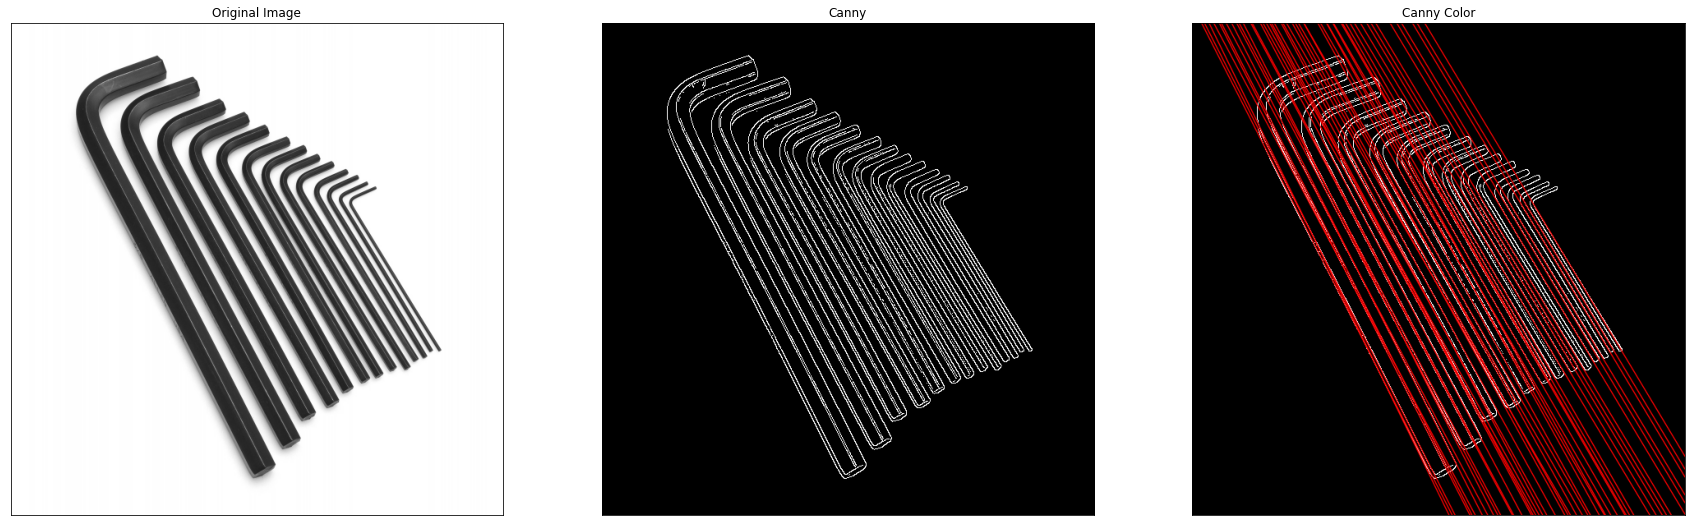

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt         
file_name = 'allenkeys.jpg'
im = cv . imread ( file_name , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv .Canny( im, 50 , 150)

# Copy edges to the images that will display the results in BGR
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)
lines = cv .HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)

if lines is not None:
    for i in range (0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0+1000*(-b)),int(y0 + 1000*(a)))
        pt2 = (int(x0-1000*(-b)),int(y0 - 1000*(a)))
        cv.line(canny_color,pt1,pt2,(0,0,255),1,cv.LINE_AA)
    
fig , ax =  plt.subplots(1,3,figsize =  (30,10))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
ax[1].set_title('Canny')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[2].set_title('Canny Color')

r = cv.selectROI('Image', canny_color, showCrosshair=True , fromCenter=False)
cv.waitKey(0)
cv . destroyAllWindows ()
print(r)
 
plt.show()


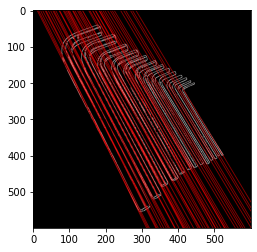

In [13]:
x0 , y0 = int(r[0]+r[2]/2),int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[:,0,1]))
c = y0 - m*x0 #Intercept

cv.line(canny_color,(0,int(c)),(im.shape[0],int(m*im.shape[0]+c)),(0,255,0),2,cv.LINE_AA)

fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))



item 1 ,value in pixels 1
item 1 ,value in mm^2 0.039204
item 2 ,value in pixels 2
item 2 ,value in mm^2 0.078408
item 3 ,value in pixels 3
item 3 ,value in mm^2 0.117612
item 4 ,value in pixels 4
item 4 ,value in mm^2 0.156816
item 5 ,value in pixels 5
item 5 ,value in mm^2 0.19602000000000003
item 6 ,value in pixels 6
item 6 ,value in mm^2 0.235224
item 7 ,value in pixels 7
item 7 ,value in mm^2 0.274428
item 8 ,value in pixels 8
item 8 ,value in mm^2 0.313632
item 9 ,value in pixels 9
item 9 ,value in mm^2 0.35283600000000004
item 10 ,value in pixels 10
item 10 ,value in mm^2 0.39204000000000006
item 11 ,value in pixels 11
item 11 ,value in mm^2 0.431244
item 12 ,value in pixels 12
item 12 ,value in mm^2 0.470448
item 13 ,value in pixels 13
item 13 ,value in mm^2 0.509652
item 14 ,value in pixels 14
item 14 ,value in mm^2 0.548856
item 15 ,value in pixels 15
item 15 ,value in mm^2 0.58806
item 16 ,value in pixels 16
item 16 ,value in mm^2 0.627264
item 17 ,value in pixels 17
item 17

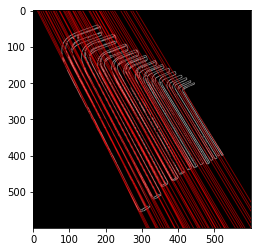

In [24]:
x0 , y0 = int(r[0]+r[2]/2),int(r[1]+r[3]/2)
m = b/a # Gradient
m = np.tan(np.median(lines[:,0,1]))
c = y0 - m*x0 #Intercept

cv.line(canny_color,(0,int(c)),(im.shape[0],int(m*im.shape[0]+c)),(0,255,0),2,cv.LINE_AA)

fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(canny_color,cv.COLOR_BGR2RGB))

dy = 1
y_subpixel = np.arange(0,im.shape[0]-1,dy)
f_sub_pixel_nn = np.zeros_like(y_subpixel)

z = 720
f = 8 

for i,y in enumerate(y_subpixel):
    if i != 0:
        print('item',i,',value in pixels', y)
        print('item',i,',value in mm^2', y*(2.2e-3)**2*(z*z)/(f*f))

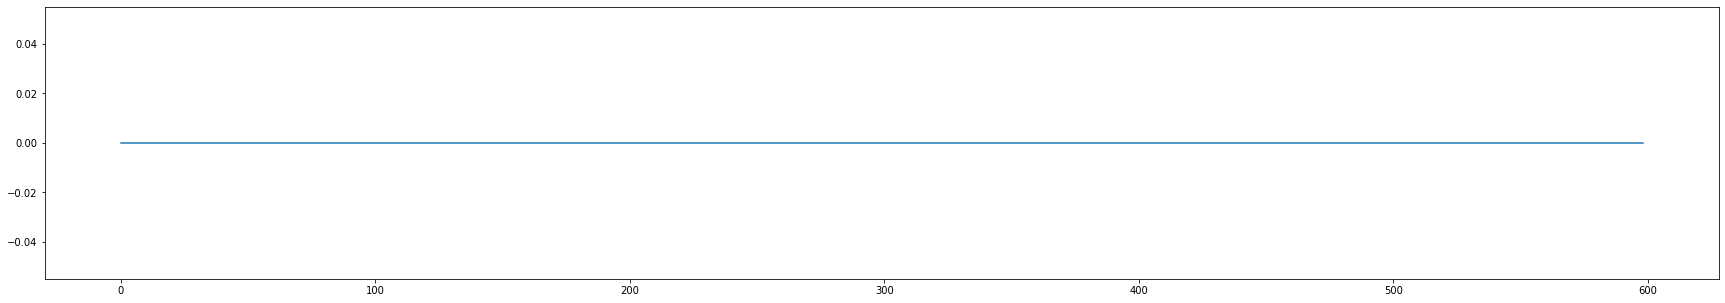

In [10]:
fig, ax = plt.subplots(figsize = (30,5))
ax.plot(f_sub_pixel_nn)

plt.show()